[10.452, 10.291, 10.096, 9.899, 9.783, 9.761999999999999, 9.758999999999999, 9.751, 9.761999999999999, 9.779, 9.768, 9.809000000000001, 9.888, 9.975, 10.062999999999999, 10.155, 10.215, 10.279, 10.276, 10.272, 10.309000000000001, 10.322, 10.32, 10.322, 10.291, 10.265, 10.27, 10.249, 10.338000000000001, 10.458, 10.549000000000001, 10.64, 10.739, 10.837, 10.945999999999998, 11.019, 11.065999999999999, 11.151999999999997, 11.183, 11.206, 11.225999999999999, 11.221, 11.222, 11.212, 11.218, 11.233999999999998, 11.291999999999998, 11.327, 11.349, 11.376, 11.327, 11.282, 11.233]


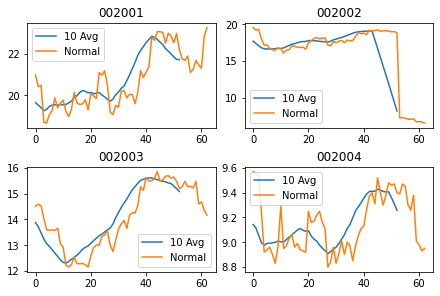

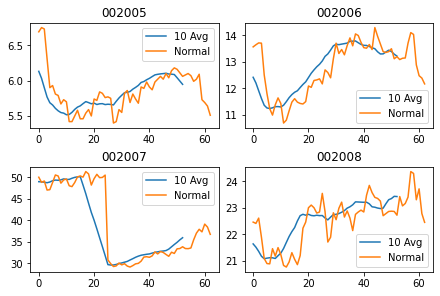

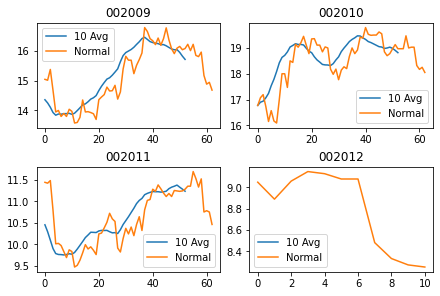

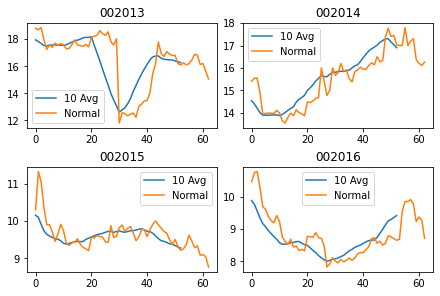

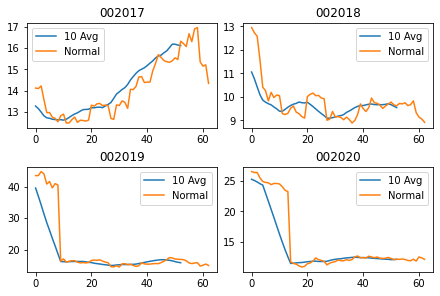

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def getTenDaysAvg(inputDataframe, code):
    avgPrice = inputDataframe["Clsprc"].values
    date = inputDataframe["Trddt"].values
    length = len(avgPrice)
    output = []
    for index in range(length - 10):
        output.append([code, date[index], np.mean(avgPrice[index:index + 10])])
    return output

def getDateAndAvg(inputData):
    date = []
    avg = []
    for index in range(len(inputData)):
        date.append(inputData[index][1])
        avg.append(inputData[index][2])
    return date, avg

data = pd.read_excel('trd.xlsx')

stocks = data["Stkcd"].drop_duplicates().values

tenDaysAvg = []

for stock in stocks:
    inputDataframe = data.loc[data["Stkcd"] == stock]
    output = getTenDaysAvg(inputDataframe, stock)
    for innerdata in output:
        tenDaysAvg.append(innerdata)

for index in range(len(stocks)):
    if (index % 4) == 0:
        fig, ax = plt.subplots(2, 2, constrained_layout = True)
        for col in range(2):
            for row in range(2):
                tenDate, tenAvg = getDateAndAvg([item for item in tenDaysAvg if item[0] == stocks[index]])
                avg = data.loc[data["Stkcd"] == stocks[index]]["Clsprc"].values
                ax[col, row].plot(tenAvg, label="10 Avg")
                ax[col, row].plot(avg, label = "Normal")
                ax[col, row].legend()
                ax[col, row].set_title("00" + str(stocks[index]))
                index = index + 1
# 002012数据不足